In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package

In [2]:
# Importing dataset excel file using pandas.
df= pd.read_csv('C:/Users/dell/Downloads/Clean_Dataset.csv (1)/Clean_Dataset.csv')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 300153
No. of Columns : 12


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.drop(columns='Unnamed: 0', inplace =True)

In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['days_left', 'price'], float64: ['duration'], object: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']}

In [6]:
df.duplicated().sum()

0

In [7]:
df.isin([' ','?','-','null','NA']).sum().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [32]:
print(df['duration'].median())

11.25


In [33]:
print(df['duration'].mean())

12.221020812717917


In [35]:
print(df['price'].mean())
print(df['price'].median())

20889.660523133203
7425.0


In [9]:
df.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [10]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [11]:
df['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [12]:
df['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [13]:
df['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [14]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [15]:
df['days_left'].value_counts()

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64

In [16]:
df.shape

(300153, 11)

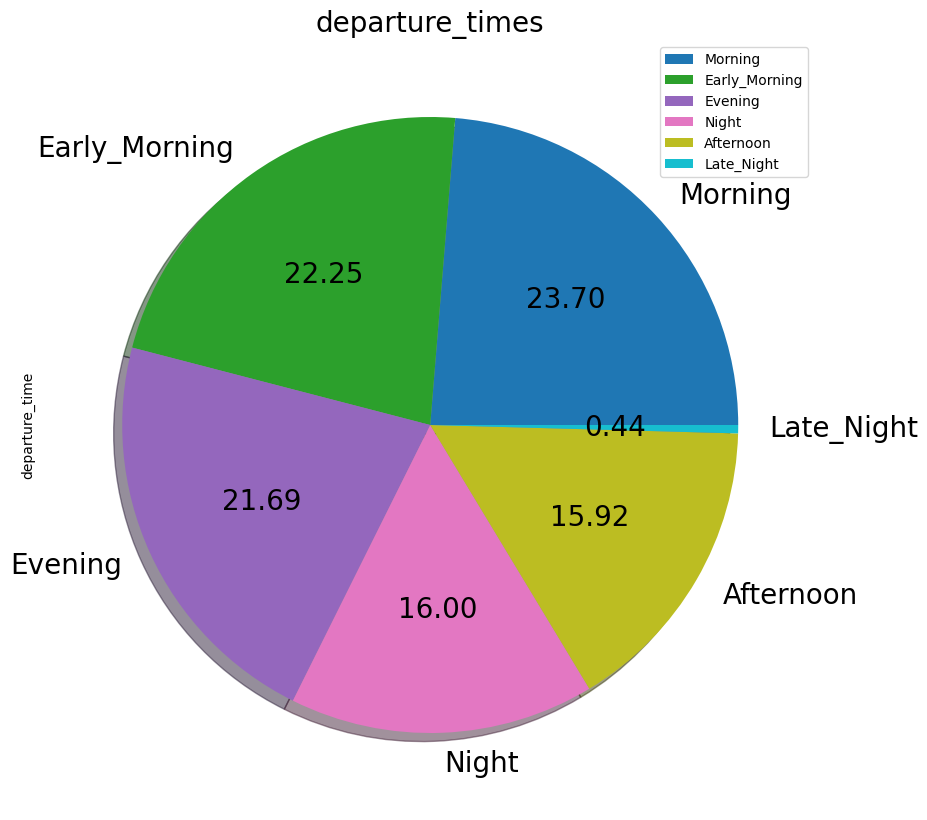

In [17]:
plt.figure(figsize=(12,10))
df['departure_time'].value_counts().plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='tab10', shadow=True)
plt.title('departure_times',fontsize=20)
plt.legend(['Morning','Early_Morning','Evening','Night','Afternoon','Late_Night'])
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


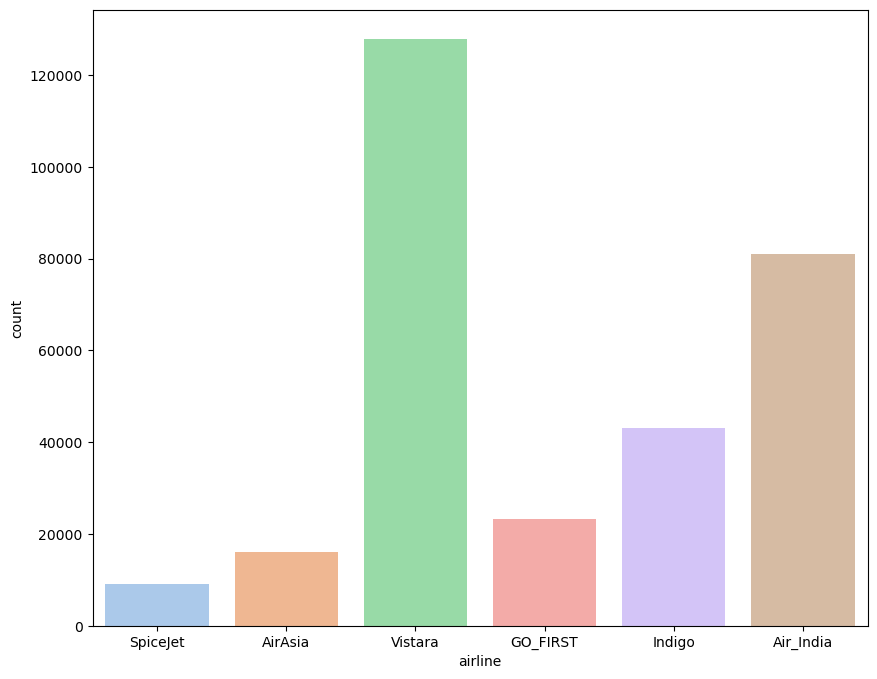

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df['airline'],palette='pastel');

In [19]:
df.groupby(['airline']).count()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
AirAsia,16098,16098,16098,16098,16098,16098,16098,16098,16098,16098
Air_India,80892,80892,80892,80892,80892,80892,80892,80892,80892,80892
GO_FIRST,23173,23173,23173,23173,23173,23173,23173,23173,23173,23173
Indigo,43120,43120,43120,43120,43120,43120,43120,43120,43120,43120
SpiceJet,9011,9011,9011,9011,9011,9011,9011,9011,9011,9011
Vistara,127859,127859,127859,127859,127859,127859,127859,127859,127859,127859


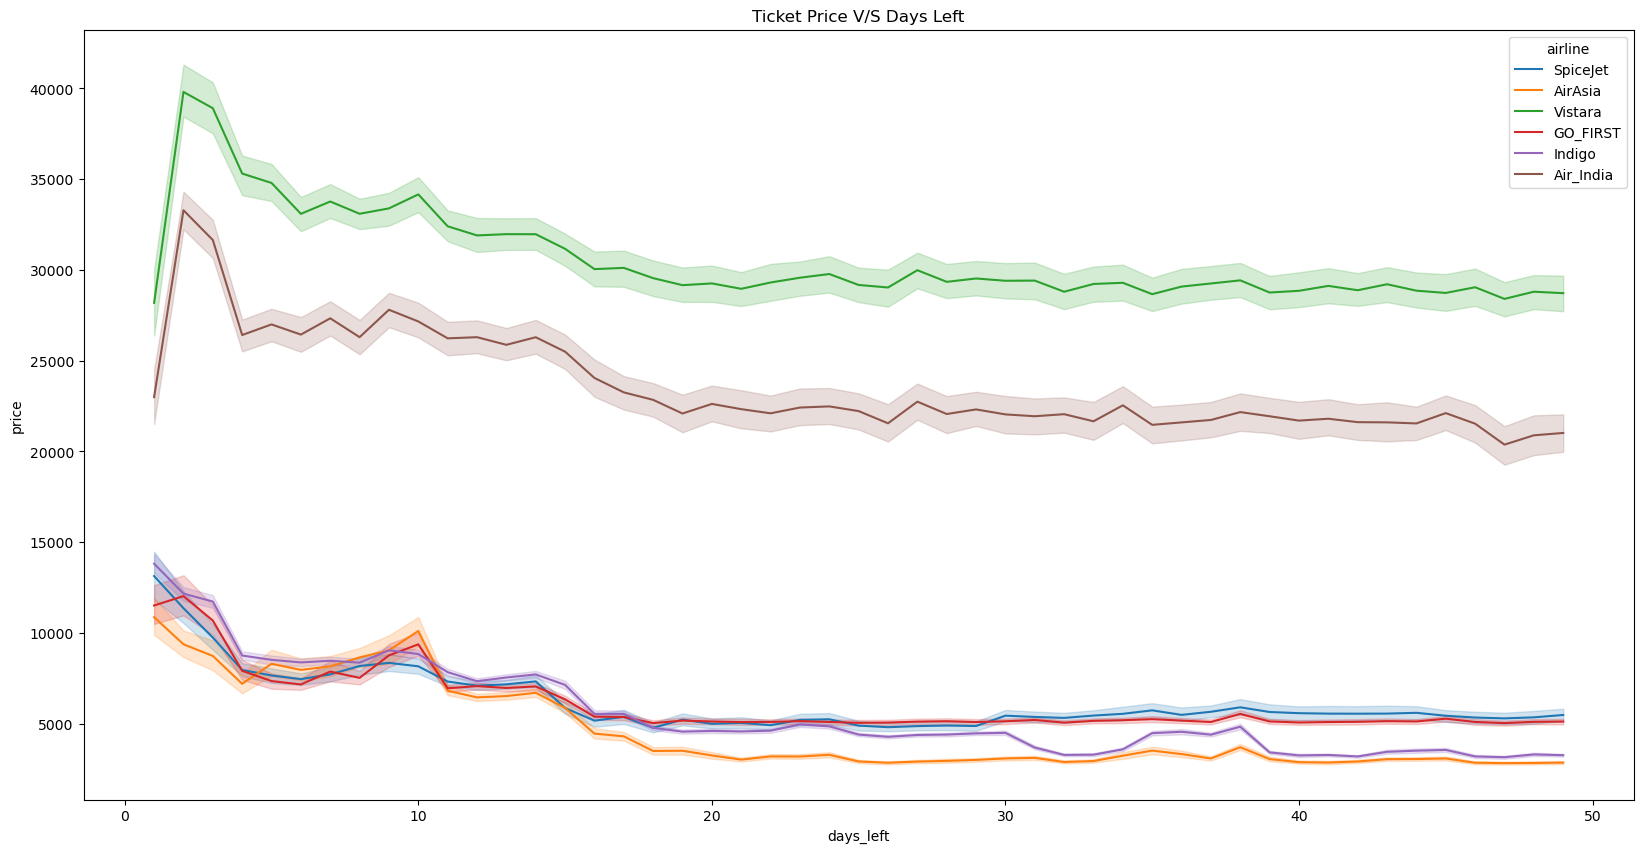

In [20]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, y = 'price', x= 'days_left', hue = 'airline',markers=True, dashes=False)
plt.title('Ticket Price V/S Days Left')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [37]:
#pip install scikit-learn numpy
# storing the dependent variables in X and Independent Variable in Y
x = df.drop(['price'], axis = 1)
y = df['price']

In [38]:
# Splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((240122, 10), (240122,), (60031, 10), (60031,))

In [39]:
print()
print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)


          airline   flight source_city departure_time        stops  \
148417  Air_India   AI-424     Kolkata      Afternoon          one   
36879      Indigo  6E-2193       Delhi      Afternoon  two_or_more   
274531  Air_India   AI-768     Kolkata      Afternoon          one   
166397    Vistara   UK-876   Hyderabad          Night          one   
272722    Vistara   UK-774     Kolkata          Night          one   
...           ...      ...         ...            ...          ...   
119879    Vistara   UK-776     Kolkata        Evening          one   
259178    Vistara   UK-866   Bangalore          Night          one   
131932  Air_India   AI-770     Kolkata          Night          one   
146867   GO_FIRST   G8-102     Kolkata      Afternoon          one   
121958  Air_India   AI-732     Kolkata      Afternoon          one   

         arrival_time destination_city     class  duration  days_left  
148417        Morning          Chennai   Economy     19.42          6  
36879         

In [31]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    '''
        INPUT :
        - df : a pandas DataFrame

         OUTPUT :
        - variable_array : The processed array
    ''' 
    #We obtain a copy of the relevalnt fields from the DataFrame. This avoids modifying the dataframe directly. Instead, we work in a copy. Notice that we are not copying pageviews field
    variable = df[['prices']].copy()
    
    #Step 1.  Apply the np.sqrt( ) on the values of page_views
    variable['sqrt_days_left'] = np.sqrt(df[['days_left']])
    
    # Step 2. Transform our variable in numpy array np.array(variable)
    variable_array = np.array(variable)
    
    # Step 3. Add a columns of ones to the matrix 𝐗 so it can handle the parameter 𝑤0.
    # For this purpose we will use the function PolynomialFeatures from scikit-learn
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)


    return variable_array